In [1]:
# Import packages

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [40]:
# Import data

atmos = fits.open('qs_ph_disk_center.fits')[0].data[:, :, :473, :473]
modelout_ptp = fits.open('modelout_ptp_132x132.fits')[0].data
modelout_sc = fits.open('modelout_sc_132x132.fits')[0].data

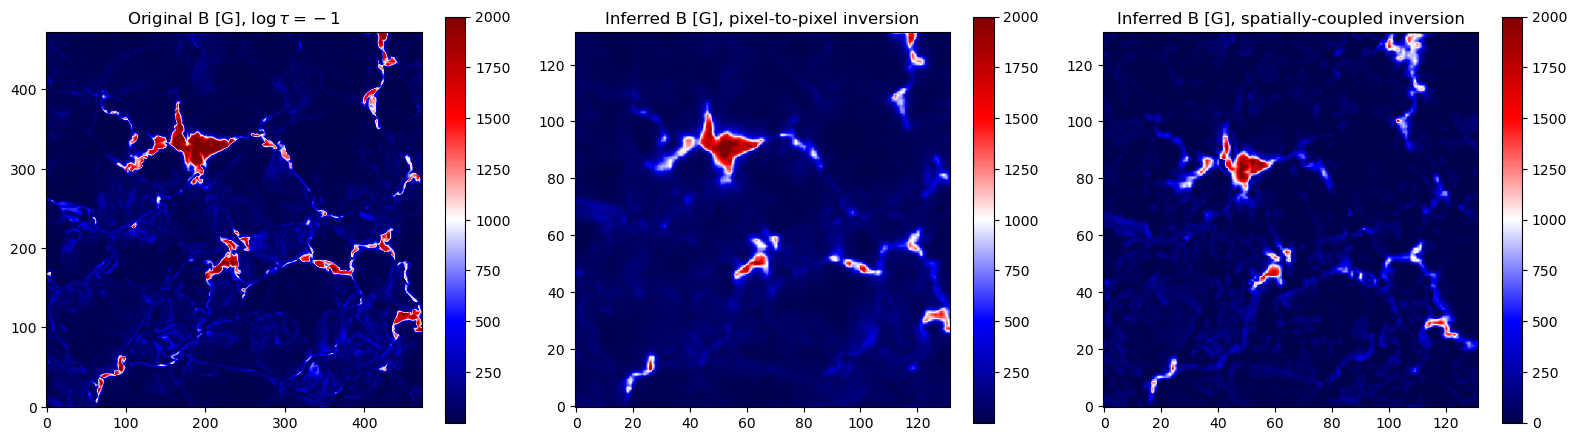

In [15]:
# Plotting

plt.figure(figsize=[16, 4.5])

plt.subplot(1, 3, 1)
plt.imshow(atmos[4, 25].T, origin='lower', cmap='seismic', vmax=2000)
plt.title(r'Original B [G], $\log{\tau}=-1$')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(modelout_ptp[:132,:132,0], origin='lower', cmap='seismic', vmax=2000)
plt.title(r'Inferred B [G], pixel-to-pixel inversion')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(modelout_sc[:,:,0], origin='lower', cmap = 'seismic', vmax=2000)
plt.title(r'Inferred B [G], spatially-coupled inversion')
plt.colorbar()
plt.tight_layout()

plt.show()

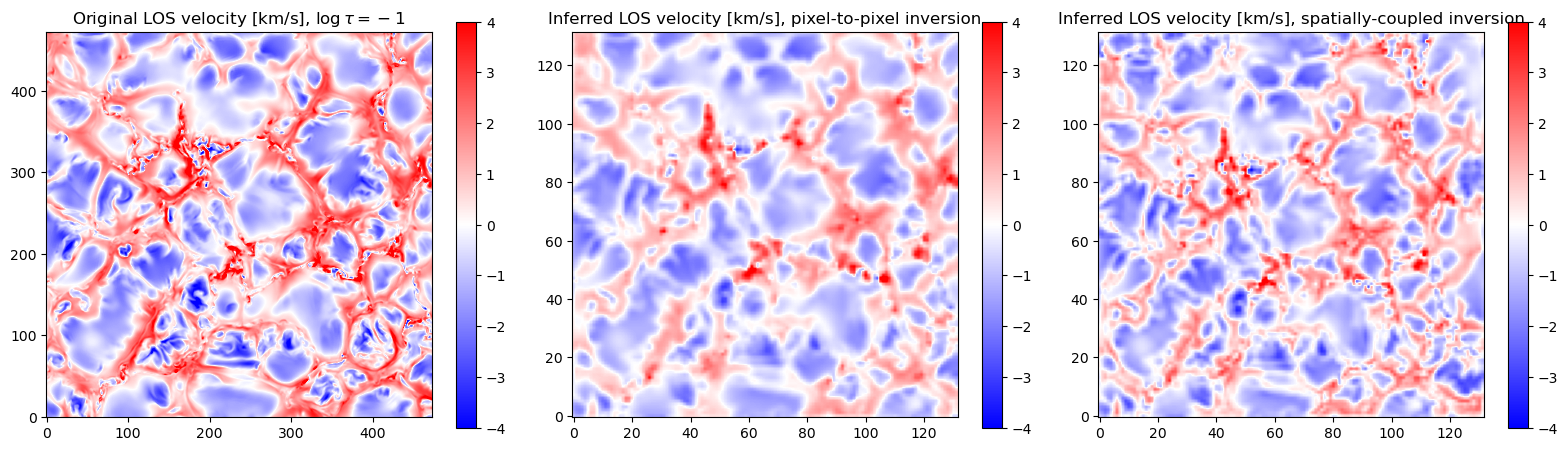

In [43]:
plt.figure(figsize=[16, 4.5])

# atmos[5, 25, :, :] /= 100000

plt.subplot(1, 3, 1)
plt.imshow(atmos[5, 25, :, :].T, origin='lower', cmap='bwr', vmin=-4, vmax=4)
plt.title(r'Original LOS velocity [km/s], $\log{\tau}=-1$')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(modelout_ptp[:,:,3], origin='lower', cmap='bwr', vmin=-4, vmax=4)
plt.title(r'Inferred LOS velocity [km/s], pixel-to-pixel inversion')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(modelout_sc[:,:,3], origin='lower', cmap = 'bwr', vmin=-4, vmax=4)
plt.title(r'Inferred LOS velocity [km/s], spatially-coupled inversion')
plt.colorbar()
plt.tight_layout()

plt.show()

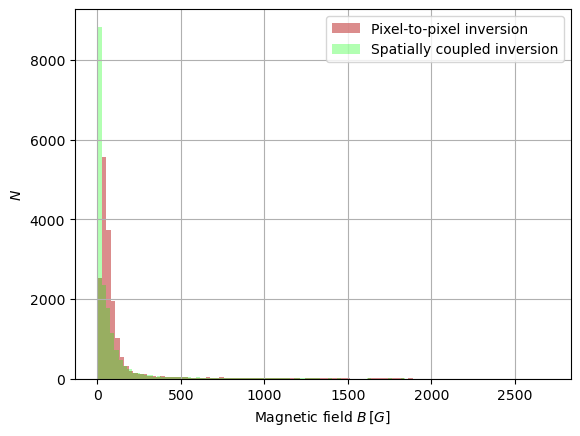

In [58]:
# Histograms - different approach to comparison of the two inversion methods
num_bins = 100

plt.hist(modelout_ptp[:, :, 0].ravel(), bins=num_bins, color='indianred',
            alpha=0.7, label='Pixel-to-pixel inversion')
plt.hist(modelout_sc[:, :, 0].ravel(), bins=num_bins, color='lime',
            alpha=0.3, label='Spatially coupled inversion')
plt.xlabel(r'Magnetic field $B\,[G]$')
plt.ylabel(r'$N$')
plt.legend()
plt.grid()

plt.show()

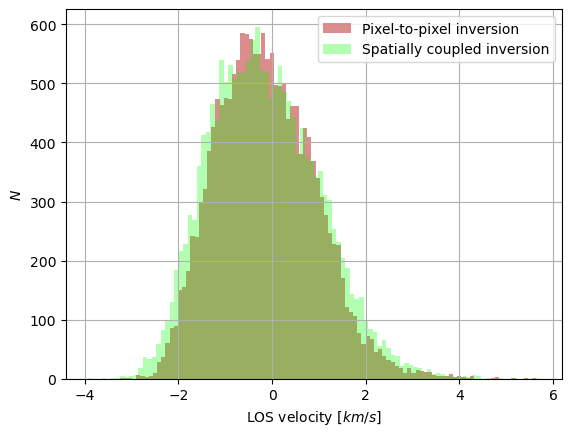

In [55]:
# Histograms - different approach to comparison of the two inversion methods
num_bins = 100

plt.hist(modelout_ptp[:, :, 3].ravel(), bins=num_bins, color='indianred',
            alpha=0.7, label='Pixel-to-pixel inversion')
plt.hist(modelout_sc[:, :, 3].ravel(), bins=num_bins, color='lime',
            alpha=0.3, label='Spatially coupled inversion')
#plt.hist(atmos[5, 25, :, :].ravel(), bins=num_bins, color='navy',
#            alpha=0.2, label='Original data')
plt.xlabel(r'LOS velocity $[km/s]$')
plt.ylabel(r'$N$')
plt.legend()
plt.grid()

plt.show()